# Carbon to Oxygen Abundance Diagram

In [1]:
import fitsio
from matplotlib import pyplot as plt
import numpy as np

## Read AllStar File, Select Giants, Good C&O Measurements

In [2]:
# Read in Data
data = fitsio.read("./allStar-dr17-synspec.fits")

# Remove Bad Measurements, Select Giants 
starbad = 2**23
gd1 = np.bitwise_and(data["ASPCAPFLAG"], starbad) == 0
gd  = np.logical_and(data["LOGG"] < 4, gd1 )


# Apply Criteria for Abundance Errors
abun_good = np.logical_and(data["O_FE_ERR"]<0.05, data["C_FE_ERR"]<0.05)

# Sub Select Sample
ind = np.where(np.logical_and(gd, abun_good))
data2 = data[ind]


In [9]:
# Memory Management
del gd1 
del gd
del abun_good
del data

NameError: name 'data' is not defined

## Plot C to O

Text(0.5, 1.0, 'Carbon to Oxygen')

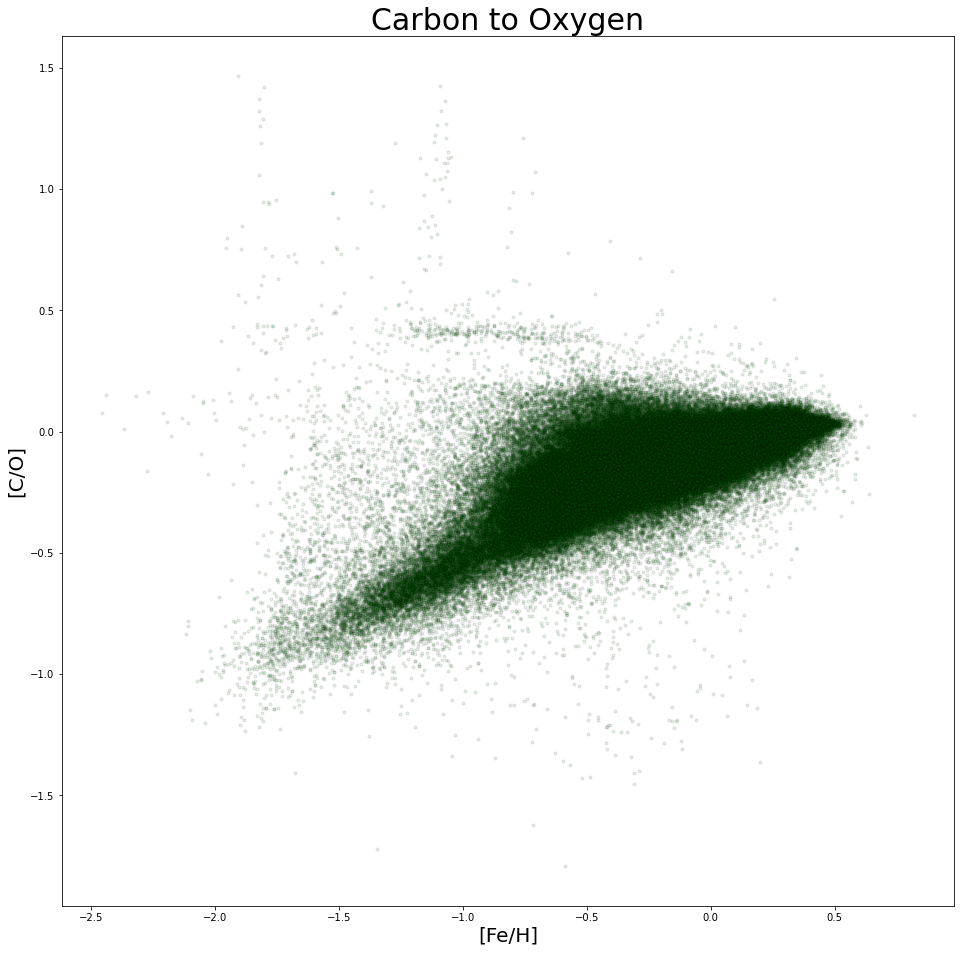

In [10]:
c_fe = data2["C_FE"]
o_fe = data2["O_FE"]
fe_h = data2["FE_H"]
c_to_o = c_fe - o_fe

fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(111)
image1 = ax1.scatter(fe_h, c_to_o, c="g" ,edgecolor='k',alpha=0.1, marker=".")
ax1.set_ylabel("[C/O]", size=20)
ax1.set_xlabel("[Fe/H]", size=20)
ax1.set_title("Carbon to Oxygen", size=30)

In [11]:
del data2